In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [458]:
def harker_diagram_plotter(path_to_csv, dataset_name):
    """
    This function takes in chemical oxide data in weight percent
    and outputs Harker diagrams with SiO2 on the x-axis and other oxides on the
    y-axis. The end result is a 4x2 Harker plots with sublpots. 
    
    """
    ## Open the CSV file
    raw_data = pd.read_csv(path_to_csv)
    raw_data.head()

    ## Extract data for each oxide from csv:
    oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O']
    print('Oxide count: ', len(oxides))

    oxide_data = {}

    for oxide in oxides:
        if oxide in raw_data:
            oxide_data[oxide] = raw_data[oxide]

        else:
            print(f"Warning: {oxide} not found in the DataFrame columns.")


    ## Create a Numpy array for each oxide
    oxide_arrays = {oxide: oxide_data.to_numpy() for oxide, oxide_data in oxide_data.items()}
    oxides_df = pd.DataFrame(oxide_arrays)

    ## Isolate SiO2 and non-SiO2 oxides
    oxides_df_nosio2 = oxides_df.drop(columns=oxides_df.columns[0])
    SiO2 = oxides_df["SiO2"]
    ######### PLOT GENERATION #########
    ####################################
    
    ## Create the plot
    fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11,24))
    axes = axes.flatten()

    # For each oxide in the amended oxides
    for n, oxide in enumerate(oxides_df_nosio2):
        axes[n].scatter(SiO2, oxide_arrays[oxide])
        axes[n].set_title(f'SiO2 vs. {oxide}')
        axes[n].set_xlabel('SiO2 (%)')
        axes[n].set_ylabel(f'{oxide} (%)')
        axes[n].set_box_aspect(1)  # Set the aspect ratio to be equal (square)

    ## Title and adjustments for master plot
    fig.suptitle(f'{dataset_name} Harker diagrams', fontsize=20)
    plt.subplots_adjust(top=1.2)
    plt.tight_layout()
    
    return 


In [198]:
seguam_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/seguam.csv'
thingmuli_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/thingmuli.csv'
newberry_tnc_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/newberry_ca.csv'
newberry_ca_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/newberry_tnc.csv'
augustine_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/augustine.csv'
hcb_path = r'Documents/GitHub/magmas_and_eruptions/Problems/Problem 2 -- geochemistry of Hat Creek Basalt/oxide_data/hat_creek_basalt.csv'

Oxide count:  9


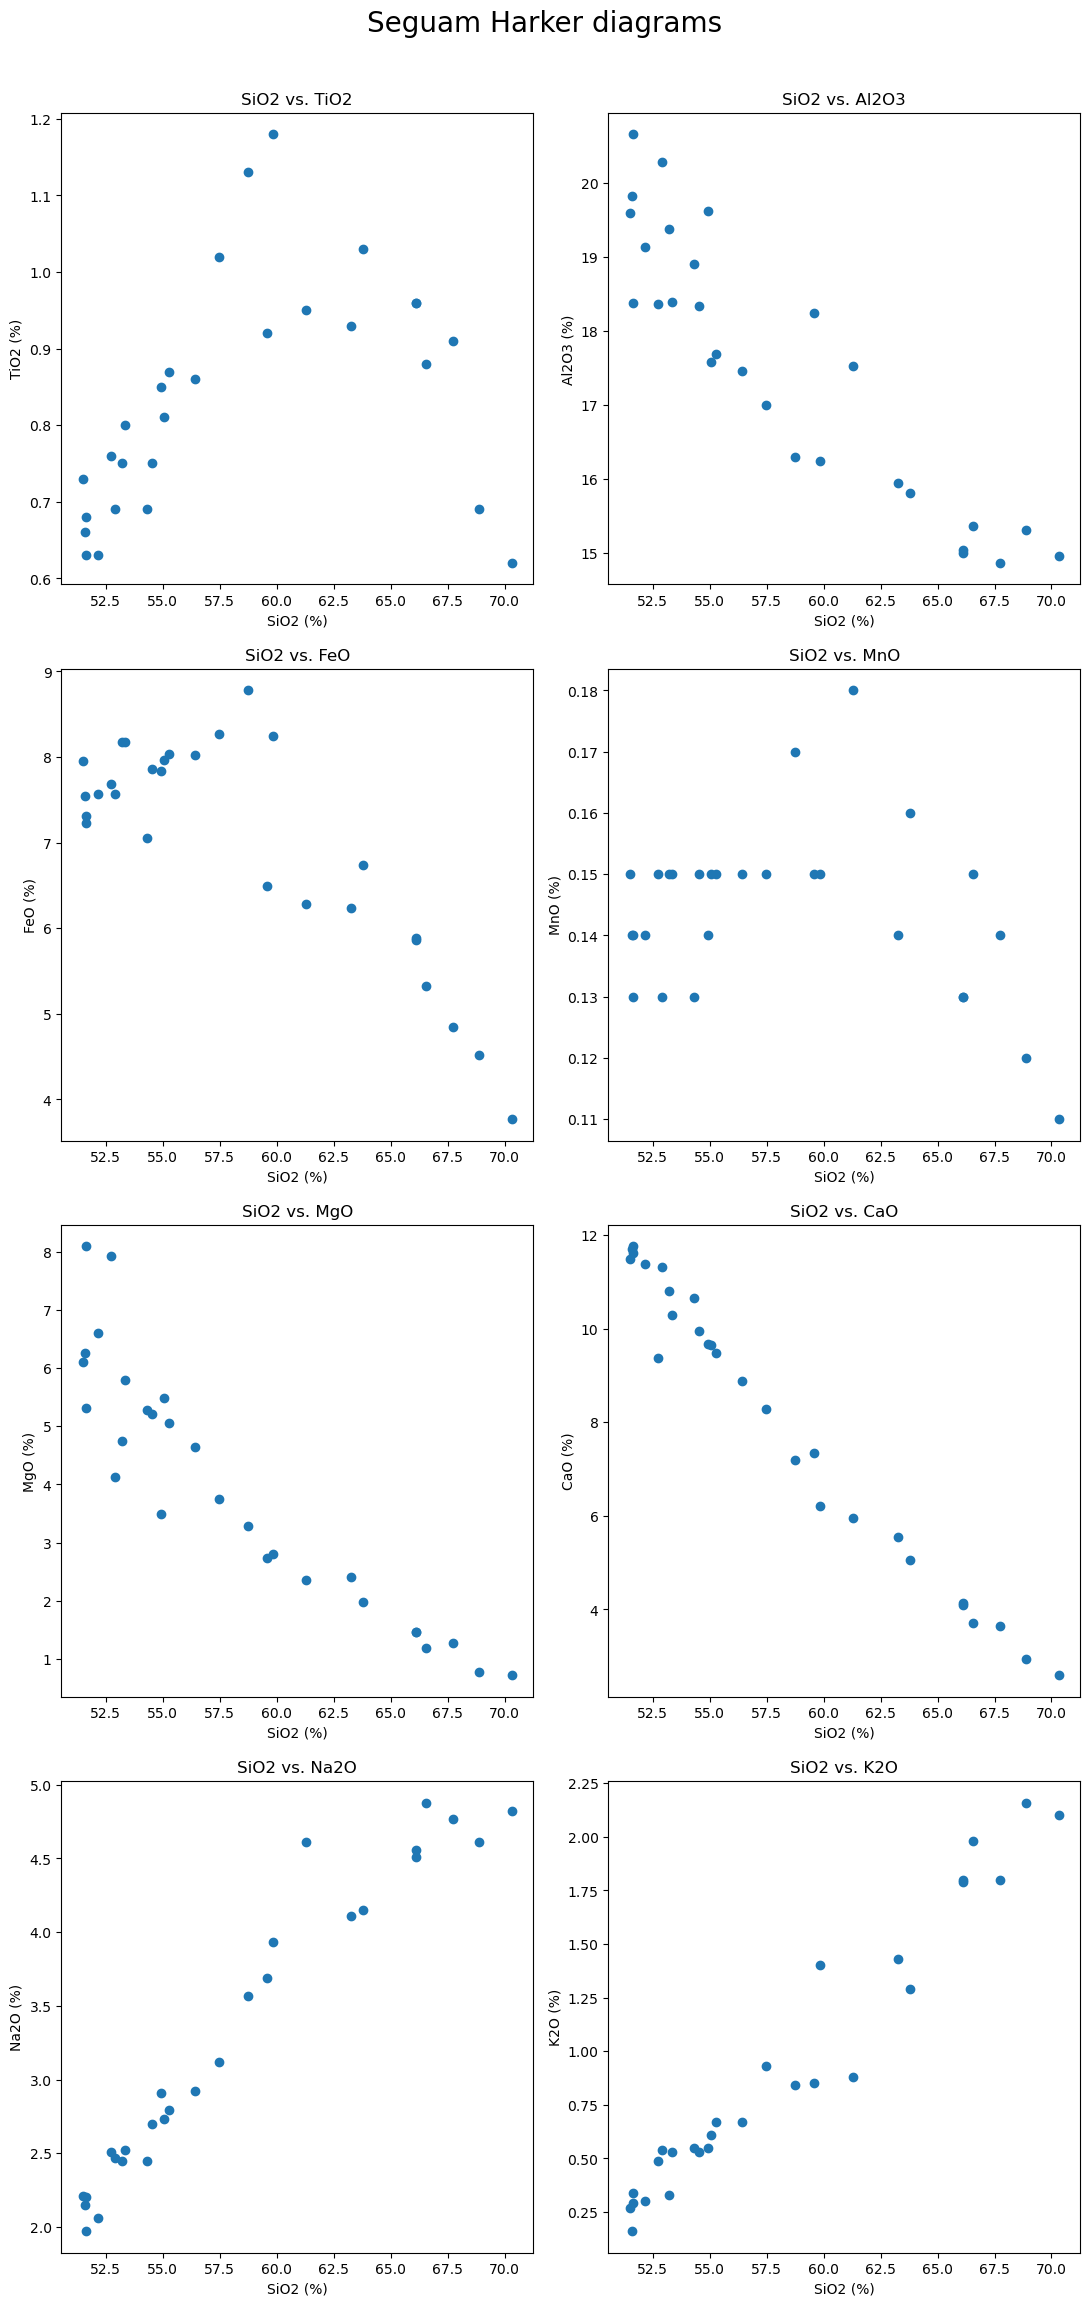

In [318]:
harker_diagram_plotter(seguam_path, 'Seguam')
#harker_diagram_plotter(newberry_tnc_path, 'Newberry TNC')
#harker_diagram_plotter(newberry_ca_path, 'Newberry CA')
#harker_diagram_plotter(thingmuli_path, 'Thingmuli')
#harker_diagram_plotter(augustine_path, 'Augustine')
#harker_diagram_plotter(hcb_path, 'Hat Creek Basalt')

In [254]:
## Open the CSV file
raw_data = pd.read_csv(seguam_path)
raw_data.head()

## Extract data for each oxide from csv:
oxides = ['SiO2', 'TiO2', 'Al2O3', 'FeO', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O']
print('Oxide count: ', len(oxides))

oxide_data = {}

for oxide in oxides:
    if oxide in raw_data:
        oxide_data[oxide] = raw_data[oxide]

    else:
        print(f"Warning: {oxide} not found in the DataFrame columns.")

## Create a Numpy array for each oxide
oxide_arrays = {oxide: oxide_data.to_numpy() for oxide, oxide_data in oxide_data.items()}
oxides_df = pd.DataFrame(oxide_arrays)

oxides_df

Oxide count:  9


,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O
0,51.65,0.68,20.66,7.31,0.13,5.32,11.76,2.20,0.29
1,51.57,0.66,19.83,7.54,0.14,6.25,11.70,2.15,0.16
2,51.49,0.73,19.60,7.95,0.15,6.11,11.48,2.21,0.27
3,51.61,0.63,18.38,7.23,0.14,8.09,11.61,1.97,0.34
4,52.72,0.76,18.36,7.69,0.15,7.93,9.38,2.51,0.49
5,52.17,0.63,19.14,7.57,0.14,6.60,11.38,2.06,0.30
6,52.89,0.69,20.28,7.57,0.13,4.13,11.31,2.47,0.54
7,53.21,0.75,19.38,8.18,0.15,4.75,10.80,2.45,0.33
8,53.36,0.80,18.39,8.18,0.15,5.79,10.29,2.52,0.53
9,54.29,0.69,18.90,7.05,0.13,5.28,10.66,2.45,0.55


In [324]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

## Load data
x = oxides_df['SiO2'].values.reshape(-1,1) #-1 tells Numpy to count num of rows
y = oxides_df['Al2O3'].values

## Generate linear regression models
reg = linear_model.LinearRegression().fit(x,y)
score = reg.score(x, y)

new_y = reg.predict(x)



## Determine which models have a good fit

0.838123337780076

In [486]:
from typing import List
import pandas as pd
import numpy as np

def multiple_csvs_to_df(csv_paths: List[str], key_names: List[str]) -> pd.DataFrame:
    """
    Combines multiple csvs with oxide chemical data and weight percents together by
    oxide type. A new column with the parent unit of each data point will
    be created accroding to the names passed into 'names'. The output is a single 
    dataframe with all oxides and weights labeled by unit.
    """
    all_arrays = []

    for csv_path, name in zip(csv_paths, key_names):
        data = pd.read_csv(csv_path)
        data['unit'] = name
        all_arrays.append(data)


        combined_df = pd.concat(all_arrays, ignore_index = True)
        combined_df = combined_df.drop(columns=['Sample'])
    return combined_df



In [482]:
csv_paths = [seguam_path, thingmuli_path, newberry_tnc_path, newberry_ca_path, augustine_path, hcb_path]
names = ["seguam", "thingmuli", "newberry_tnc", "newberry_ca", "augustine", "hcb"]

IndexError: index 8 is out of bounds for axis 0 with size 8

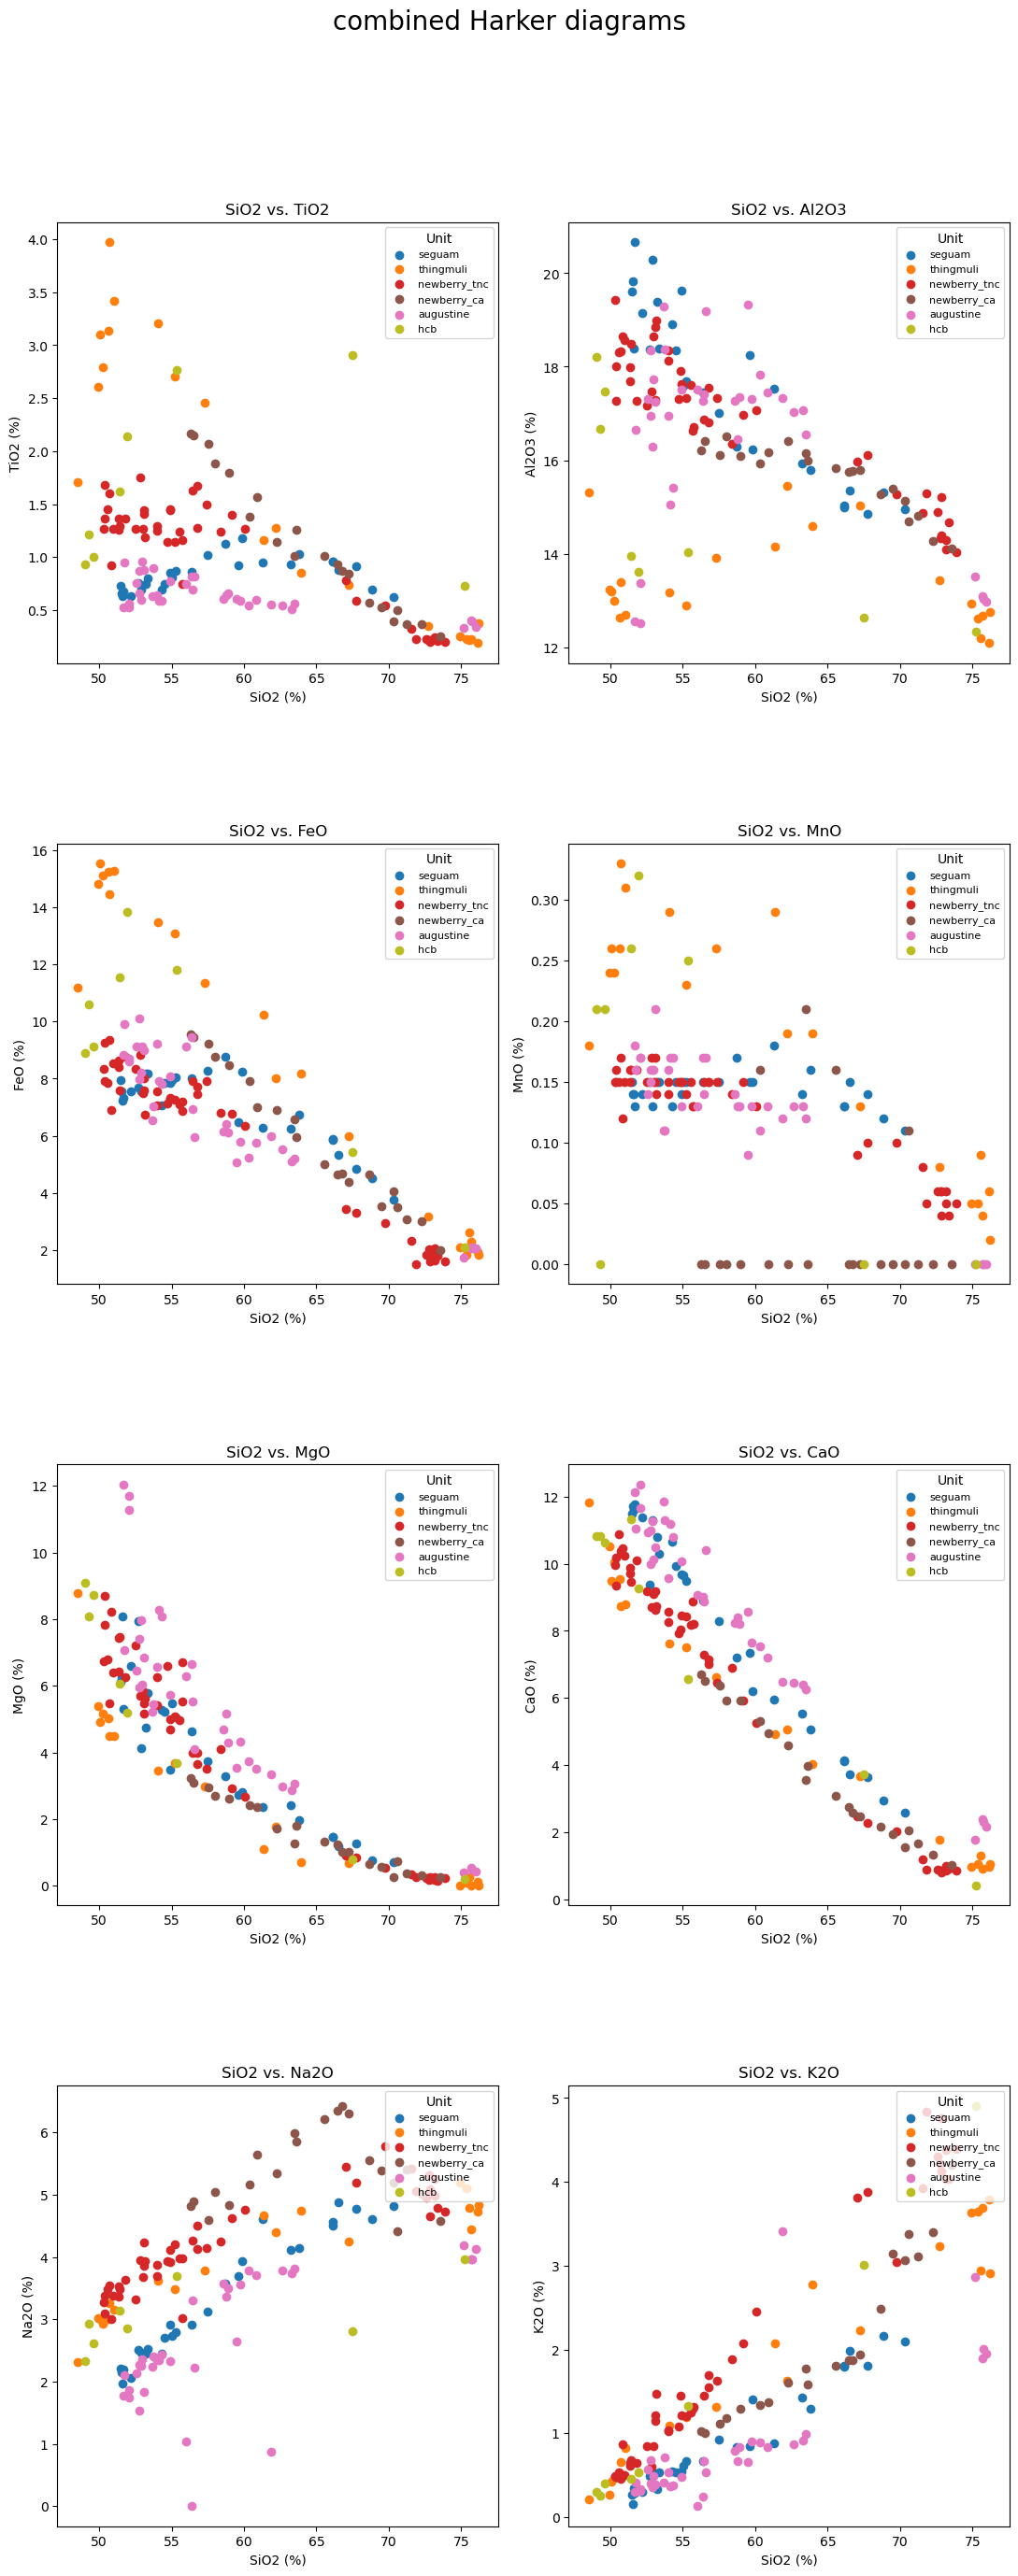

In [492]:
big_df = multiple_csvs_to_df(csv_paths, names)

## Isolate SiO2 and non-SiO2 oxides
big_df_nosio2 = big_df.drop(columns=oxides_df.columns[0])
SiO2 = big_df["SiO2"]
    
######### PLOT GENERATION #########
####################################

## Create the plot
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(11,30))
axes = axes.flatten()

# Define a colormap (you can use any colormap from Matplotlib)
colormap = plt.cm.tab10  # Or try 'viridis', 'plasma', 'Set1', etc.

# Get unique units from the DataFrame
units = big_df_nosio2['unit'].unique()

# Create a color mapping for each unique unit
color_map = {unit: colormap(i / len(units)) for i, unit in enumerate(units)}

# For each oxide in the amended oxides
for n, oxide in enumerate(big_df_nosio2.columns):
    ax = axes[n]
    for unit in units:
        subset = big_df[big_df['unit'] == unit]

        ax.scatter(subset['SiO2'], 
                   subset[oxide],
                   label=unit,
                   color=color_map[unit])

    ax.set_title(f'SiO2 vs. {oxide}')
    ax.set_xlabel('SiO2 (%)')
    ax.set_ylabel(f'{oxide} (%)')
    ax.set_box_aspect(1)  # Set the aspect ratio to be equal (square)

    ## Title and adjustments for master plot
    fig.suptitle('combined Harker diagrams', fontsize=20)
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    ax.legend(title="Unit", loc='upper right', fontsize=8)

,Sample,SiO2,TiO2,Al2O3,FeO,MnO,MgO,CaO,Na2O,K2O,Total,unit,P2O5,Sum
0,Sample 1,51.65,0.68,20.66,7.31,0.13,5.32,11.76,2.20,0.29,100.0,seguam,NaN,NaN
1,Sample 2,51.57,0.66,19.83,7.54,0.14,6.25,11.70,2.15,0.16,100.0,seguam,NaN,NaN
2,Sample 3,51.49,0.73,19.60,7.95,0.15,6.11,11.48,2.21,0.27,100.0,seguam,NaN,NaN
3,Sample 4,51.61,0.63,18.38,7.23,0.14,8.09,11.61,1.97,0.34,100.0,seguam,NaN,NaN
4,Sample 5,52.72,0.76,18.36,7.69,0.15,7.93,9.38,2.51,0.49,100.0,seguam,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,HC7-1,51.39,1.62,13.96,11.53,0.26,6.07,11.33,3.14,0.46,NaN,hcb,0.25,100.0
155,HC7-5,51.95,2.14,13.62,13.83,0.32,5.19,9.25,2.85,0.54,NaN,hcb,0.33,100.0
156,HC4-6,55.34,2.77,14.04,11.79,0.25,3.69,6.56,3.69,1.33,NaN,hcb,0.54,100.0
157,HC7-6G,67.50,2.91,12.64,5.42,0.00,0.80,3.71,2.81,3.01,NaN,hcb,1.20,100.0
